# 로지스틱 회귀분석

In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
import pandas as pd
import numpy as np

from statsmodels.formula.api import logit
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
import pandas as pd
import numpy as np
import scipy as sp
import re

import statsmodels

import statsmodels.api as sm
from scipy.stats import bartlett, levene, shapiro, probplot, norm, ttest_1samp
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [17]:
# y = tip, x = 그 외 나머지

tips = sns.load_dataset('tips')
tips['target'] = tips['total_bill']
tips = tips.drop('total_bill', axis=1)

tips.describe()
tips.duplicated().sum()
tips.isnull().sum()



ValueError: could not convert string to float: 'Female'

In [4]:
data = pd.read_csv('../국민건강보험공단_건강검진정보_2023.csv', encoding='cp949')
data

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
0,2023,34735,46,2,9,155,70,92.0,1.2,1.2,...,24.0,50.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
1,2023,4105118,11,1,17,160,55,86.0,0.9,9.9,...,11.0,31.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
2,2023,362482,36,2,13,150,65,96.0,1.0,0.8,...,29.0,24.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
3,2023,653166,11,1,13,160,70,85.0,1.0,1.2,...,21.0,27.0,3.0,1.0,1,0.0,NaN,NaN,NaN,0.0
4,2023,4152237,41,1,12,165,65,84.5,1.0,1.2,...,33.0,49.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2023,3265034,26,1,8,170,65,78.0,1.2,1.0,...,13.0,22.0,1.0,1.0,1,0.0,NaN,NaN,NaN,1.0
999996,2023,1421865,41,1,10,165,80,96.1,0.9,1.2,...,65.0,160.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN
999997,2023,3889375,41,2,11,155,65,87.0,0.5,0.7,...,26.0,25.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
999998,2023,2618086,41,2,7,160,55,69.0,1.0,1.2,...,20.0,16.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN


In [73]:
data.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석'],
      dtype='object')

In [ ]:
plt.roP

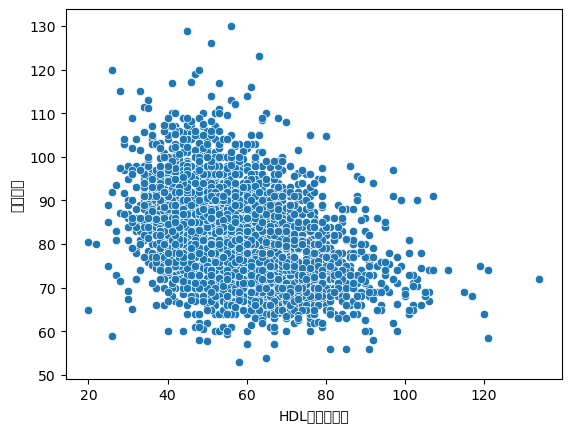

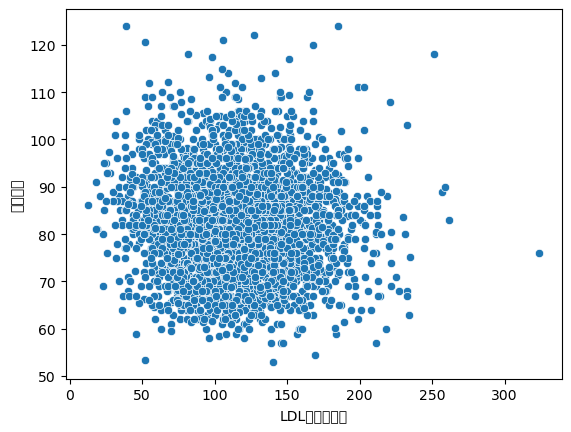

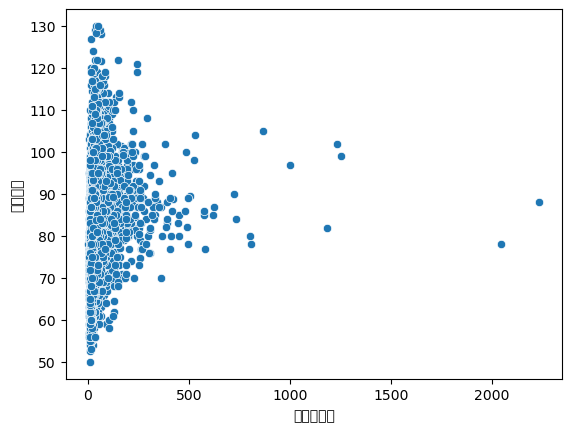

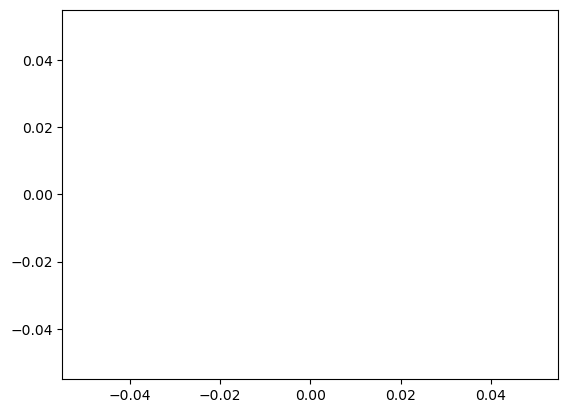

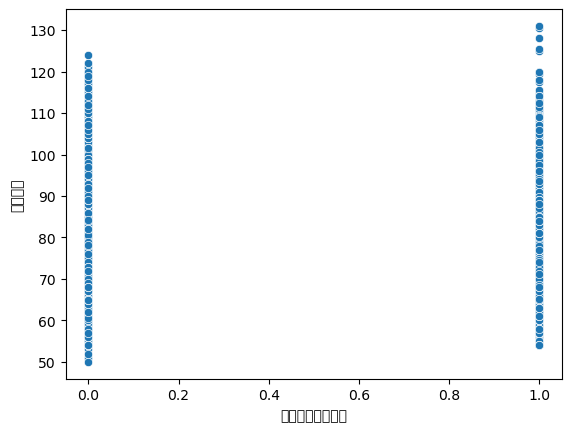

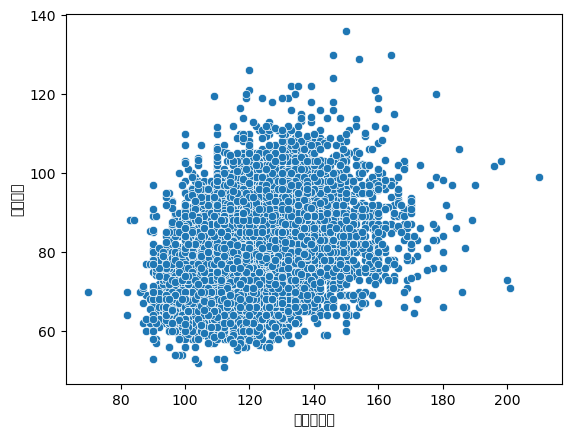

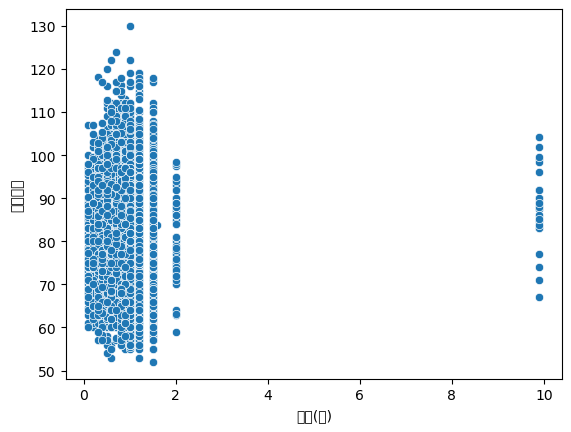

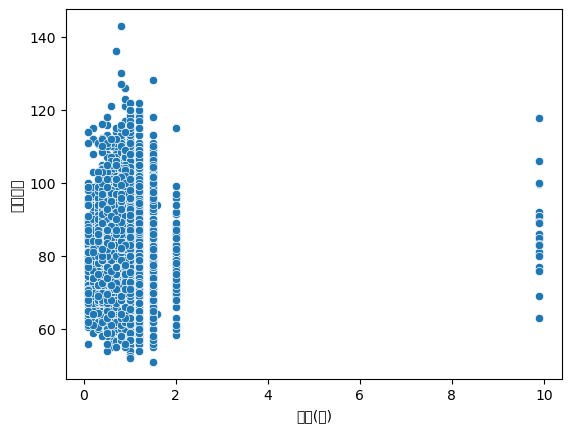

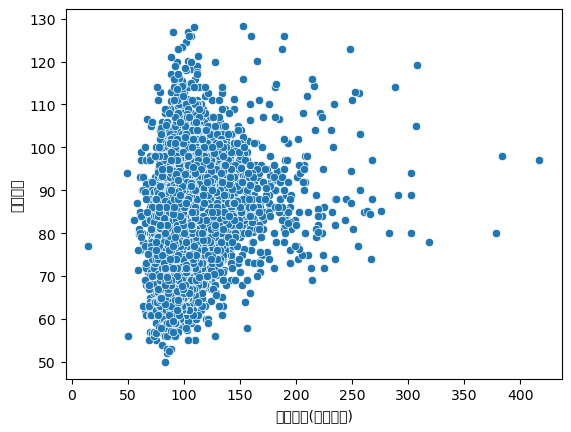

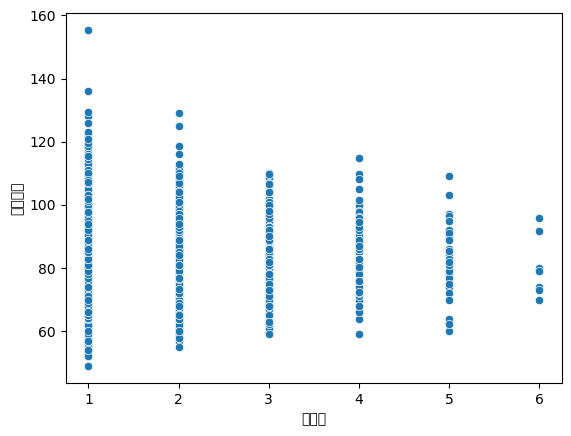

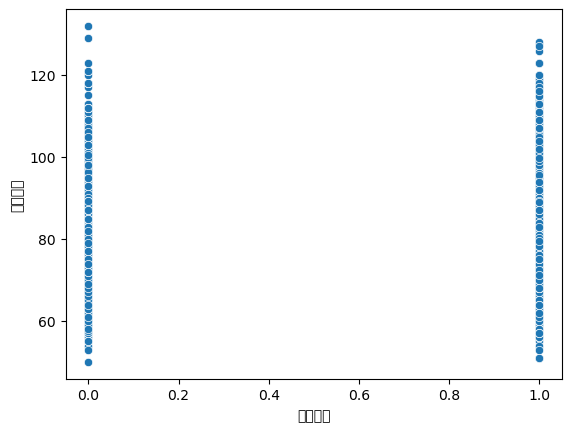

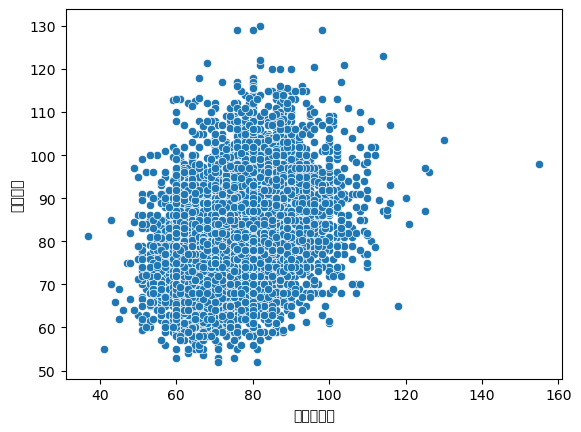

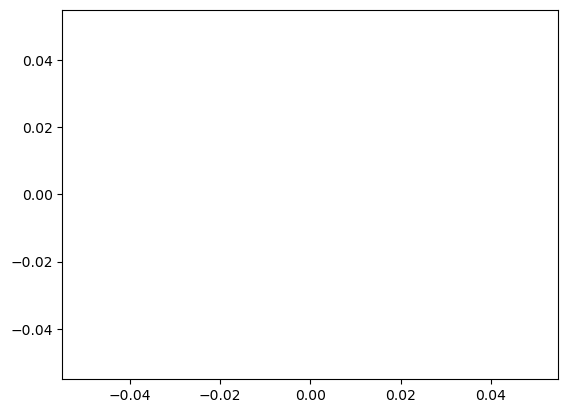

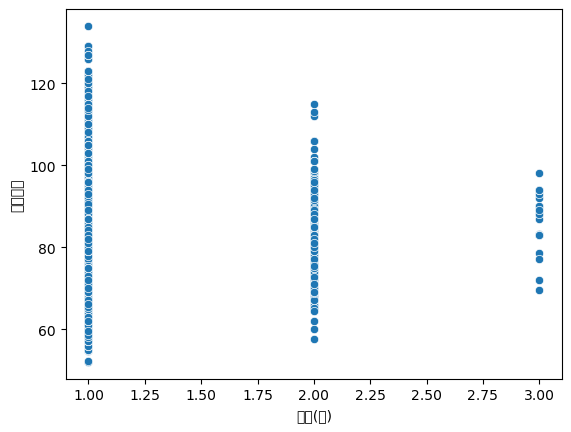

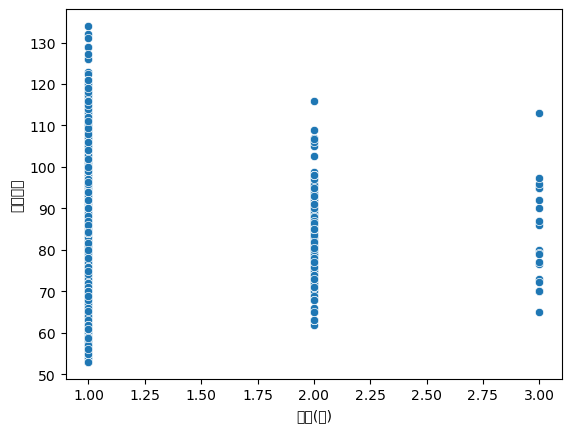

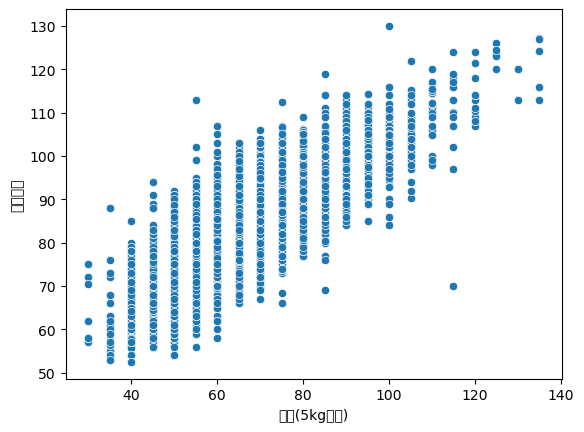

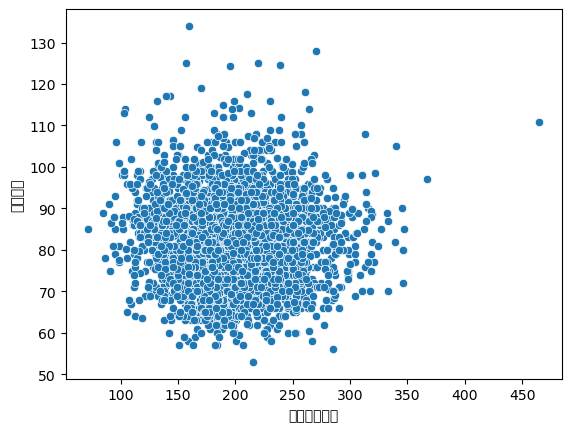

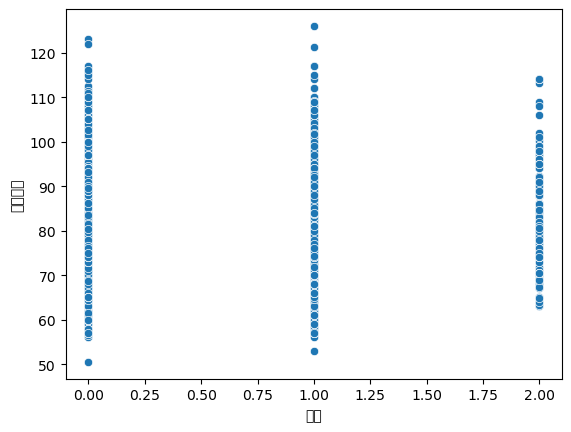

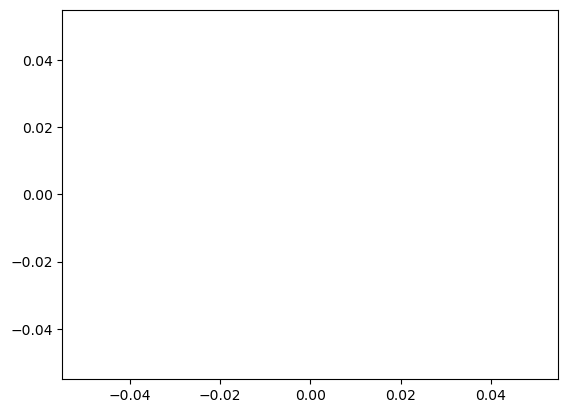

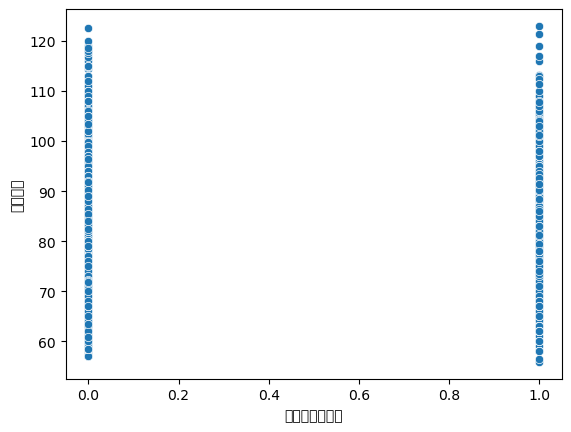

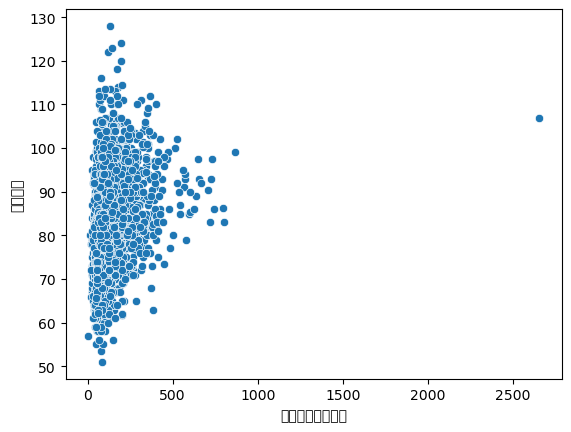

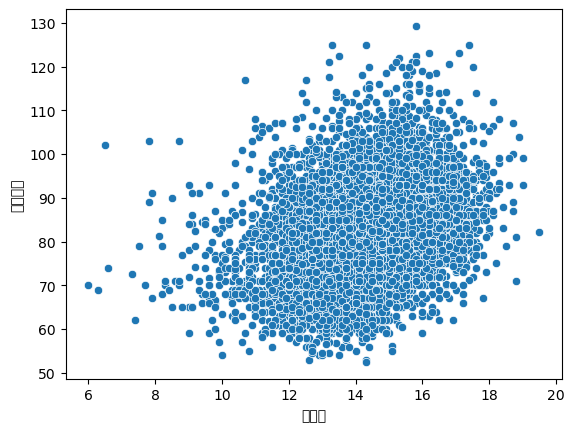

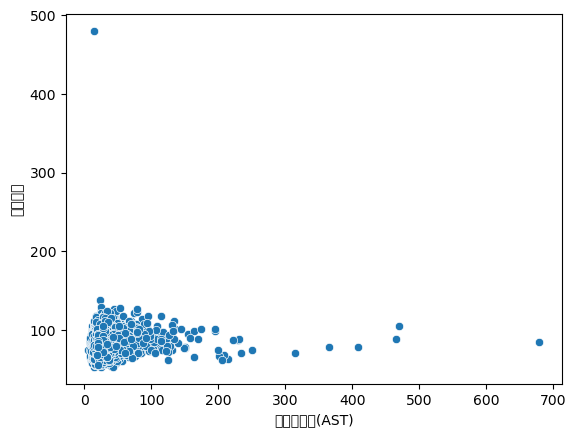

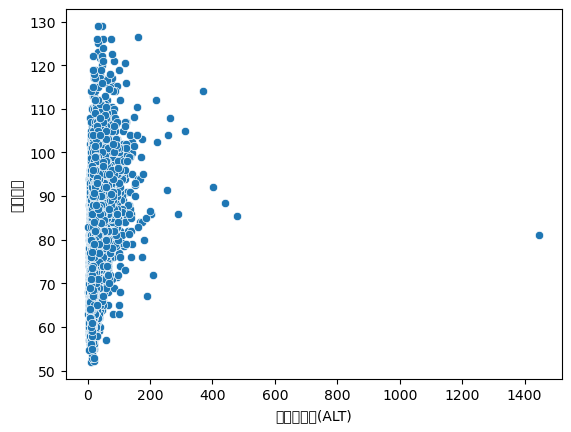

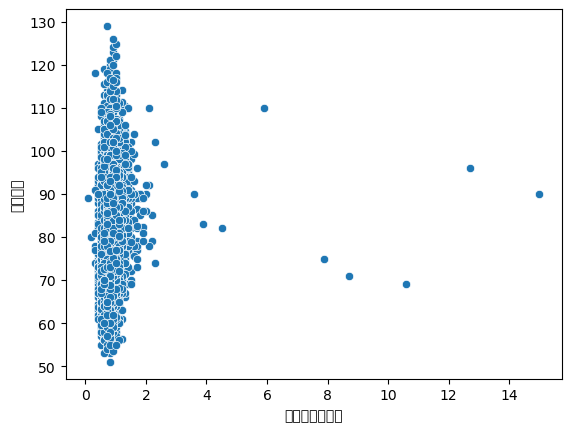

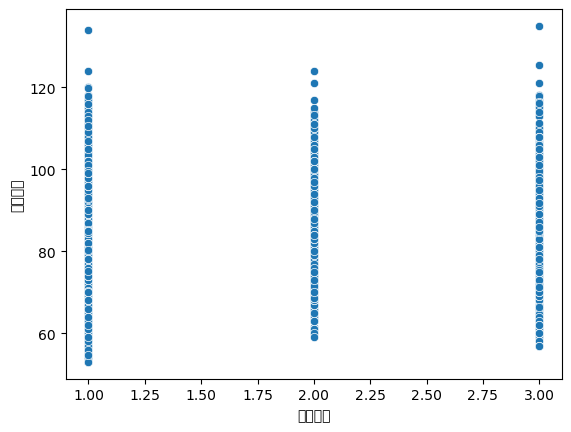

In [64]:
for column in data.columns[6:].difference(['허리둘레']):
    sns.scatterplot(
        data.sample(n=10000),
        x = column,
        y = '허리둘레'
    )

    plt.show()
    plt.clf

In [6]:
data = data.filter(items=['허리둘레', '체중(5kg단위)', 'HDL콜레스테롤', '수축기혈압', '이완기혈압', '혈색소', '음주여부', '흡연상태'])
data = data.dropna()
print(data)
data = data.drop_duplicates()
print(data)
data = data.reset_index(drop=True)
data = data.rename(columns={'체중(5kg단위)':'체중'})
data

        허리둘레  체중(5kg단위)  HDL콜레스테롤  수축기혈압  이완기혈압   혈색소  음주여부  흡연상태
0       92.0         70      46.0  139.0   89.0  13.8   1.0   1.0
2       96.0         65      52.0  109.0   69.0  13.5   1.0   1.0
3       85.0         70      45.0  116.0   64.0  15.6   1.0   3.0
9       89.0         80      55.0  146.0   85.0  16.5   1.0   2.0
10      97.0         70      57.0  131.0   81.0  14.2   1.0   1.0
...      ...        ...       ...    ...    ...   ...   ...   ...
999985  87.5         55      70.0  142.0   77.0  14.6   1.0   1.0
999988  80.0         30      64.0  135.0   62.0  11.5   0.0   1.0
999992  79.0         50      47.0  110.0   70.0  13.7   0.0   1.0
999994  71.1         55      77.0  122.0   82.0  11.4   0.0   1.0
999996  96.1         80      59.0  139.0   86.0  15.3   1.0   2.0

[338534 rows x 8 columns]
        허리둘레  체중(5kg단위)  HDL콜레스테롤  수축기혈압  이완기혈압   혈색소  음주여부  흡연상태
0       92.0         70      46.0  139.0   89.0  13.8   1.0   1.0
2       96.0         65      52.0  109.0   69.0  

,허리둘레,체중,HDL콜레스테롤,수축기혈압,이완기혈압,혈색소,음주여부,흡연상태
0,92.0,70,46.0,139.0,89.0,13.8,1.0,1.0
1,96.0,65,52.0,109.0,69.0,13.5,1.0,1.0
2,85.0,70,45.0,116.0,64.0,15.6,1.0,3.0
3,89.0,80,55.0,146.0,85.0,16.5,1.0,2.0
4,97.0,70,57.0,131.0,81.0,14.2,1.0,1.0
...,...,...,...,...,...,...,...,...
338447,87.5,55,70.0,142.0,77.0,14.6,1.0,1.0
338448,80.0,30,64.0,135.0,62.0,11.5,0.0,1.0
338449,79.0,50,47.0,110.0,70.0,13.7,0.0,1.0
338450,71.1,55,77.0,122.0,82.0,11.4,0.0,1.0


In [95]:
model = sm.OLS.from_formula('scale(허리둘레) ~ scale(체중) + scale(HDL콜레스테롤) + scale(수축기혈압) + scale(이완기혈압) + scale(혈색소) + C(음주여부) + C(흡연상태)', data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            scale(허리둘레)   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                 8.460e+04
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:03:16   Log-Likelihood:            -2.9435e+05
No. Observations:              338452   AIC:                         5.887e+05
Df Residuals:                  338443   BIC:                         5.888e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1033      0.002     58.046      0.000       0.100       0.107
C(음주여부)[T.1.0]     -0.1710      0.002    -76.599      0.000      -0.175      -0.167
C(흡연상태)[T.2.0]      0.0346      0.003     12.229      0.000       0.029       0.040
C(흡연상태)[T.3.0]     -0.0205      0.003     -7.102      0.000      -0.026      -0.015
scale(체중)           0.7725      0.001    625.564      0.000       0.770       0.775
scale(HDL콜레스테롤)    -0.1040      0.001    -96.685      0.000      -0.106      -0.102
scale(수축기혈압)        0.1580      0.001    114.607      0.000       0.155       0.161
scale(이완기혈압)       -0.0459      0.001    -32.565      0.000      -0.049      -0.043
scale(혈색소)         -0.0270      0.001    -22.469      0.000      -0.029      -0.025
==============================================================================
Omnibus:                   598727.389   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      40579653489.265
Skew:                          11.197   Prob(JB):                         0.00
Kurtosis:                    1699.186   Cond. No.                         5.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
print(model.resid.mean())
print('-'*30)
print(ttest_1samp(model.resid, 0))
#TtestResult(statistic=-5.20896041639436e-14, pvalue=0.9999999999999585, df=505) P-value가 1의 가까움으로 오차 평균이 0의 가깝다는 말이 맞다.

-1.2350711221906414e-16
------------------------------
TtestResult(statistic=-1.2444511116988352e-13, pvalue=0.9999999999999007, df=338451)


In [99]:
model.resid

0         0.517839
1         1.458968
2         0.017911
3        -0.359863
4         1.136121
            ...   
338447    1.022368
338448    1.452459
338449    0.448961
338450   -0.512582
338451    0.416462
Length: 338452, dtype: float64

In [ ]:
model = sns.OLS.from_formula()

In [29]:
# y = 허리둘레
# x = 자유롭게

data = data.iloc[:, 2:]
data = data.iloc[:, :-6]
data


,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부
0,46,2,9,155,70,92.0,1.2,1.2,1.0,1.0,...,46.0,86.0,13.8,1.0,0.5,26.0,24.0,50.0,1.0,1.0
1,11,1,17,160,55,86.0,0.9,9.9,1.0,2.0,...,NaN,NaN,15.5,1.0,1.3,22.0,11.0,31.0,1.0,1.0
2,36,2,13,150,65,96.0,1.0,0.8,1.0,1.0,...,52.0,107.0,13.5,1.0,1.1,22.0,29.0,24.0,1.0,1.0
3,11,1,13,160,70,85.0,1.0,1.2,1.0,1.0,...,45.0,11.0,15.6,1.0,0.9,22.0,21.0,27.0,3.0,1.0
4,41,1,12,165,65,84.5,1.0,1.2,1.0,1.0,...,NaN,NaN,14.9,1.0,0.8,23.0,33.0,49.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,26,1,8,170,65,78.0,1.2,1.0,1.0,1.0,...,NaN,NaN,13.6,1.0,0.9,19.0,13.0,22.0,1.0,1.0
999996,41,1,10,165,80,96.1,0.9,1.2,1.0,1.0,...,59.0,126.0,15.3,1.0,0.8,70.0,65.0,160.0,2.0,1.0
999997,41,2,11,155,65,87.0,0.5,0.7,1.0,1.0,...,NaN,NaN,14.7,1.0,0.8,20.0,26.0,25.0,1.0,1.0
999998,41,2,7,160,55,69.0,1.0,1.2,1.0,1.0,...,NaN,NaN,13.5,1.0,0.9,22.0,20.0,16.0,1.0,0.0


In [33]:
data.describe() # 허리둘레, 시력, 콜레스테롤, 혈청시리즈, 감마
data = data.drop(columns=['시력(좌)', '시력(우)', '청력(좌)', '청력(우)'])


KeyError: "['시력(좌)', '시력(우)', '청력(좌)', '청력(우)'] not found in axis"

In [39]:
data = data.dropna()
data = data.reset_index(drop=True)
data.describe()

,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,...,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부
count,330755.000000,330755.00000,330755.000000,330755.000000,330755.000000,330755.000000,330755.000000,330755.000000,330755.000000,330755.000000,...,330755.000000,330755.000000,330755.000000,330755.000000,330755.000000,330755.000000,330755.000000,330755.000000,330755.000000,330755.000000
mean,33.823582,1.45713,11.398246,162.328491,64.362897,82.195789,124.414373,75.917570,101.903681,196.138359,...,57.297410,114.584868,14.235987,1.142205,0.849008,27.753198,27.057502,35.884105,1.550949,0.616227
std,12.594257,0.49816,2.843157,9.651621,13.549533,10.267071,14.645475,10.192778,23.129659,42.390796,...,15.076573,38.743852,1.546235,0.516074,0.319698,20.964669,24.738936,55.917236,0.784752,0.486305
min,11.000000,1.00000,5.000000,130.000000,30.000000,22.200000,68.000000,26.000000,17.000000,44.000000,...,2.000000,1.000000,0.200000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,27.000000,1.00000,9.000000,155.000000,55.000000,75.000000,115.000000,70.000000,90.000000,167.000000,...,47.000000,88.000000,13.200000,1.000000,0.700000,20.000000,16.000000,16.000000,1.000000,0.000000
50%,41.000000,1.00000,11.000000,160.000000,65.000000,82.000000,123.000000,76.000000,97.000000,195.000000,...,55.000000,113.000000,14.300000,1.000000,0.800000,24.000000,21.000000,23.000000,1.000000,1.000000
75%,43.000000,2.00000,13.000000,170.000000,75.000000,89.000000,134.000000,82.000000,107.000000,223.000000,...,66.000000,139.000000,15.300000,1.000000,1.000000,30.000000,31.000000,38.000000,2.000000,1.000000
max,49.000000,2.00000,18.000000,195.000000,135.000000,999.000000,255.000000,171.000000,873.000000,2305.000000,...,733.000000,2277.000000,22.100000,6.000000,60.000000,2832.000000,2575.000000,9999.000000,3.000000,1.000000


In [42]:
data = data.query('`허리둘레` < 200 and `식전혈당(공복혈당)` < 500 and `총콜레스테롤` < 1000 and `HDL콜레스테롤` < 200 and `LDL콜레스테롤` < 250')
data = data.reset_index(drop=True)
data

,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,...,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부
0,46,2,9,155,70,92.0,139.0,89.0,98.0,168.0,...,46.0,86.0,13.8,1.0,0.5,26.0,24.0,50.0,1.0,1.0
1,36,2,13,150,65,96.0,109.0,69.0,114.0,220.0,...,52.0,107.0,13.5,1.0,1.1,22.0,29.0,24.0,1.0,1.0
2,11,1,13,160,70,85.0,116.0,64.0,98.0,91.0,...,45.0,11.0,15.6,1.0,0.9,22.0,21.0,27.0,3.0,1.0
3,49,1,10,165,80,89.0,146.0,85.0,74.0,194.0,...,55.0,127.0,16.5,1.0,0.7,53.0,69.0,53.0,2.0,1.0
4,28,2,13,150,70,97.0,131.0,81.0,112.0,212.0,...,57.0,136.0,14.2,1.0,0.6,41.0,45.0,61.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330256,41,2,14,155,55,87.5,142.0,77.0,103.0,120.0,...,70.0,38.0,14.6,3.0,0.6,36.0,33.0,20.0,1.0,1.0
330257,30,2,17,130,30,80.0,135.0,62.0,82.0,247.0,...,64.0,160.0,11.5,1.0,0.6,35.0,22.0,15.0,1.0,0.0
330258,28,2,13,145,50,79.0,110.0,70.0,105.0,204.0,...,47.0,113.0,13.7,1.0,0.8,30.0,23.0,24.0,1.0,0.0
330259,26,2,12,160,55,71.1,122.0,82.0,90.0,246.0,...,77.0,152.0,11.4,1.0,0.7,30.0,20.0,16.0,1.0,0.0


In [43]:
data.corr()

,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,...,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부
시도코드,1.000000,-0.009149,0.023075,-0.022103,0.006599,0.024060,0.031422,0.032638,0.022785,-0.015264,...,-0.038494,-0.011274,0.003134,-0.019388,-0.000315,0.008012,0.010466,0.012910,0.015429,-0.043634
성별코드,-0.009149,1.000000,0.239465,-0.729579,-0.565985,-0.412296,-0.083103,-0.156456,-0.078599,0.078275,...,0.308624,0.030001,-0.621008,-0.036550,-0.381204,-0.064794,-0.178345,-0.176101,-0.532975,-0.317585
연령대코드(5세단위),0.023075,0.239465,1.000000,-0.493780,-0.348809,0.010908,0.221641,-0.012817,0.185897,-0.175316,...,-0.031066,-0.172777,-0.287143,0.025253,-0.033007,0.039705,-0.089419,-0.036243,-0.174429,-0.368698
신장(5cm단위),-0.022103,-0.729579,-0.493780,1.000000,0.670224,0.334570,-0.029285,0.116567,-0.006479,0.014191,...,-0.192711,0.045255,0.506941,0.015816,0.270848,0.019939,0.142244,0.117822,0.421031,0.366352
체중(5kg단위),0.006599,-0.565985,-0.348809,0.670224,1.000000,0.799539,0.178433,0.254961,0.111033,0.001598,...,-0.345642,0.034837,0.472882,0.042080,0.229307,0.092338,0.279817,0.159770,0.321998,0.259725
허리둘레,0.024060,-0.412296,0.010908,0.334570,0.799539,1.000000,0.280539,0.256219,0.206552,-0.066117,...,-0.386472,-0.034023,0.343889,0.063387,0.184253,0.120165,0.268133,0.172055,0.230479,0.096878
수축기혈압,0.031422,-0.083103,0.221641,-0.029285,0.178433,0.280539,1.000000,0.679038,0.157794,-0.014515,...,-0.089671,-0.036898,0.092062,0.058123,0.044365,0.064458,0.083400,0.093629,0.021453,-0.047869
이완기혈압,0.032638,-0.156456,-0.012817,0.116567,0.254961,0.256219,0.679038,1.000000,0.098112,0.097133,...,-0.069176,0.064439,0.239771,0.045140,0.046919,0.068532,0.122775,0.124295,0.101498,0.082587
식전혈당(공복혈당),0.022785,-0.078599,0.185897,-0.006479,0.111033,0.206552,0.157794,0.098112,1.000000,-0.098443,...,-0.135836,-0.120322,0.080413,0.105109,0.056859,0.064188,0.104124,0.121722,0.071425,-0.029374
총콜레스테롤,-0.015264,0.078275,-0.175316,0.014191,0.001598,-0.066117,-0.014515,0.097133,-0.098443,1.000000,...,0.255904,0.926886,0.115186,-0.026751,-0.055934,-0.005935,0.027276,0.044389,-0.016703,0.089113


In [54]:
data['체중_5kg단위'] = data['체중(5kg단위)']
data = data.drop('체중(5kg단위)', axis=1)

In [ ]:
model = sm.OLS.from_formula('허리둘레 ~ ')

In [57]:
model = sm.OLS.from_formula('scale(허리둘레) ~ scale(체중_5kg단위)', data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            scale(허리둘레)   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                 5.853e+05
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:24:37   Log-Likelihood:            -3.0025e+05
No. Observations:              330261   AIC:                         6.005e+05
Df Residuals:                  330259   BIC:                         6.005e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.019e-13      0.001   9.75e-11      1.000      -0.002       0.002
scale(체중_5kg단위)     0.7995      0.001    765.018      0.000       0.797       0.802
==============================================================================
Omnibus:                     7108.628   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8082.823
Skew:                           0.324   Prob(JB):                         0.00
Kurtosis:                       3.408   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
lasso = Lasso(alpha=2).fit(data.drop(columns=['허리둘레']), data.허리둘레)

In [102]:
lasso.coef_

array([ 0.54246021, -0.07247612,  0.09096296, -0.00749396, -0.        ,
       -0.        , -0.        ])

In [8]:
train, test = train_test_split(data, test_size=0.2)
lasso = Lasso(alpha=2).fit(data.drop(columns=['허리둘레']), data.허리둘레)
lasso.coef_

array([ 0.54246021, -0.07247612,  0.09096296, -0.00749396, -0.        ,
       -0.        , -0.        ])

In [13]:
# RMSE = sqrt((y_true - ypred)**2 /n)
print('train loss:', np.sqrt((lasso.predict(train.drop(columns=['허리둘레'])) - train.허리둘레)**2).sum()/len(train))
print('test loss:', np.sqrt((lasso.predict(test.drop(columns=['허리둘레'])) - test.허리둘레)**2).sum()/len(test))

train loss: 4.59432365443181
test loss: 4.578681039033992


## Logistic Regression

회귀분석에서의 기본 가정(정규분포, 연속형 변수 등)이 충족되지 않을 때 사용하는 방법 <br>
일반화 선형모형이라고 부르며, 연결함수가 logit인 경우 logistic regression이라고 부름

Y (target)의 값이 연속형 변수가 아니라 범주형 변수일 때 사용 (연속성 미충족) <br>

Equation <br>
Linear Regression: $ Y = \beta_0 + x_1\beta_1 + ... + x_k\beta_k $ <br>
Logistic Regression: $ P(Y=k) = \beta_0 + x_1\beta_1 + ... + x_k\beta_k $

위에서 P(Y)는 Logistic Function으로, sigmoid함수 사용 <br>
위의 식을 아래와 같이 정리할 수 있음 <br>
$ Y = \frac {exp(\beta_0 + x_1\beta_1 + ... + x_k\beta_k)}{1 + exp(\beta_0 + x_1\beta_1 + ... + x_k\beta_k)} $

<br>

<left><img src="https://editor.analyticsvidhya.com/uploads/71562linear_vs_logistic_regression_edxw03.png" alt="Linear Regression vs Logistic Regression" width="800"></left>

Y 범주가 0과 1로 이루어진 범주형 변수일 때 Linear Regression (좌)와 Logistic Regression (우)의 모습 <br>
X가 특정 값보다 작을 때 0이라는 값으로 예측하고, 큰 경우 1로 예측하고 싶음 <br>

<br>

<left><img src="https://images.spiceworks.com/wp-content/uploads/2022/04/11040521/46-4-e1715636469361.png" alt="logistic" width="500" height="300"></left>

만약 위와 같은 분포를 가질 경우 Linear Regression으로 이 데이터를 설명하기가 매우 어려움
이럴 때, Logistic Regression을 사용하여 해당 데이터를 모델링

## Logistic Function

로지스틱함수는 음의 무한대부터 양의 무한대까지의 값을 0~1사이의 값으로 대응시키는 함수 <br>
보통은 시그모이드 함수를 사용

<left><img src="http://theyoonicon.com/wp-content/uploads/2017/06/sigmoid.png" alt="sigmoid" width="400" height="200"></left>

## Odds

사건 A가 발생하지 않을 확률 대비 일어날 확률의 비 <br>
$ odds = \frac{P(A)}{P(A^c)} = \frac{P(A)}{1 - P(A)} $ <br>

우리의 예측은 0~1사이의 값을 갖음 <br>
만일 에측 결과가 0.02 (y=1), 0.01 (y=0)가 나왔을 경우와 0.002 (y=1), 0.001 (y=0)가 나왔을 경우 <br>
전자는 실패 대비 성공의 차이 0.01이고, 후자는 0.001로 그 차이가 무려 10배 <br>
하지만 비율로 보자면 똑같이 2배 <br>
소수 단위에서 단순히 차를 가지고 설명하기에는 그 의미를 전달하는 데 한계가 있어 둘의 비율로 얘기하는 것이 Odds Ratio (오즈비)


## Modeling

기본적인 사용방법은 linear regression때와 동일

```python
model = logit("y ~ x", data).fit()
```
<br>

위의 from_formula는 다양한 활용 가능 <br>
- scale 
```python
model = logit("y ~ scale(x)", data).fit()
```
- $x^2$
```python
model = logit("y ~ I(x ** 2)", data).fit()
```
- 범주화
```python
model = logit("y ~ C(x)", data).fit()
```
<br>



모델 결과는 아래의 내용으로 해석
- Pseudo R-squ.
설명하고자 하는 y를 주어진 독립변수로 얼마 정도 설명할 수 있는지 나타내는 지표 <br>
범위는 0에서 1사이의 값으로 0이면 모델의 설명력이 전혀 없는 상태이고, 1에 가까울수록 모델이 데이터를 잘 설명 <br>
다만, 추정 방식이 OLS가 아니고 LL이기에 R-square를 직접 도출할 수 없어 Pseuudo를 붙임
- Log-Likelihood
모형의 적합도를 나타내는 통계량
- LL-Null
모형 검증의 Null Hypothesis (영가설, 귀무가설)이 되는 decision criterion
- LLR p-value
위에서 구한 가설검정 결과
<br>
<br>
- coef
데이터로 추정한 각 독립변수의 계수 <br>
coef는 log odds임을 주의
- t
추정 계수의 t 통계량
- P>|t|  
p-value라고도 하며 위의 통계량을 통해 얻은 값 <br>
유의수준과 비교하여 유의수준보다 작으면 해당 추정 계수가 유의
- [0.025      0.975]
해당 계수의 95% 신뢰구간에 해당하는 상, 하한 값 <br>
만일 이 범위에 0을 포함하면 해당 계수는 유의하지 않다고 판단
<br>

## Machine Learning Logistic Regression

> ```python
> from sklearn.linear_model import LogisticRegression
> 
> model = LogisticRegression().fit(X, y)
> model.score(X, y) # R square
> model.predict(X)  # predict on X
> ```

In [61]:
# x = bill_length_mm	bill_depth_mm	flipper_length_mm	body_mass_g	sex
# y = species



penquins = sns.load_dataset('penguins').dropna()
print(penquins.shape)

penquins = penquins.drop_duplicates()
print(penquins)

(333, 7)
    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female

In [11]:
penquins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [62]:
char_to_index = dict(zip(penquins.species.unique(),range(3)))
penquins.species = penquins.species.apply(lambda x: char_to_index.get(x))



In [35]:
penquins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,0,Torgersen,39.5,17.4,186.0,3800.0,Female
2,0,Torgersen,40.3,18.0,195.0,3250.0,Female
4,0,Torgersen,36.7,19.3,193.0,3450.0,Female
5,0,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,2,Biscoe,47.2,13.7,214.0,4925.0,Female
340,2,Biscoe,46.8,14.3,215.0,4850.0,Female
341,2,Biscoe,50.4,15.7,222.0,5750.0,Male
342,2,Biscoe,45.2,14.8,212.0,5200.0,Female


In [65]:
penquins.query('`species` != 2')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,0,Torgersen,39.5,17.4,186.0,3800.0,Female
2,0,Torgersen,40.3,18.0,195.0,3250.0,Female
4,0,Torgersen,36.7,19.3,193.0,3450.0,Female
5,0,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
215,1,Dream,55.8,19.8,207.0,4000.0,Male
216,1,Dream,43.5,18.1,202.0,3400.0,Female
217,1,Dream,49.6,18.2,193.0,3775.0,Male
218,1,Dream,50.8,19.0,210.0,4100.0,Male


In [64]:
logit('species ~ scale(bill_length_mm) + scale(bill_depth_mm) + scale(flipper_length_mm) + scale(body_mass_g) + C(sex)', penquins.query('`species` != 2').sample(n=30, random_state= 10)).fit()
logit.summary()

# 안되는 이유 Y값 레이블은 무조건 0, 1 두종류여야함
# 여기서는 펭귄종을 0, 1, 2 세 가지로 바꿔서 작동안함

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

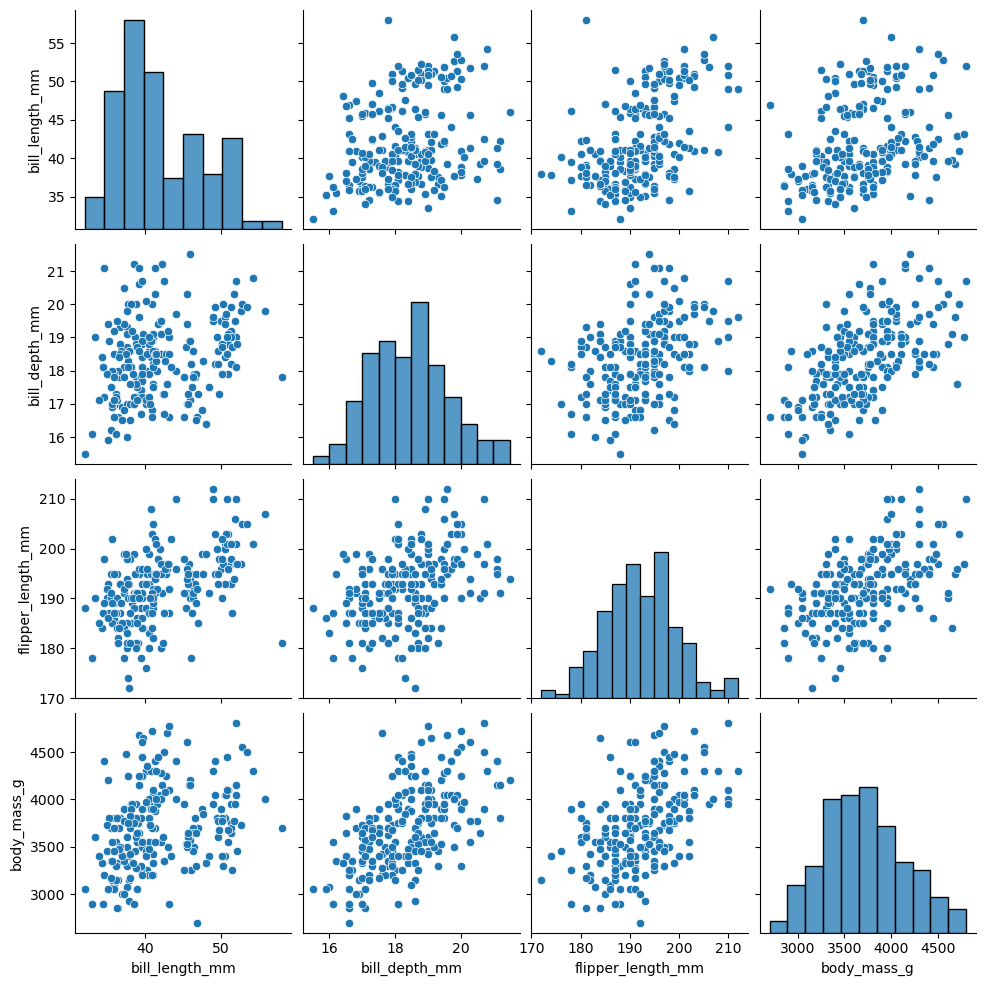

In [58]:
sns.pairplot(
    penquins.query('`species` != 2').iloc[:, 2:6]
)

In [ ]:
# 가성회귀 (중간 인과관계 생략으로 인한 거짓결과)

In [37]:
train, test = train_test_split(penquins, test_size=0.3)
model = LogisticRegression().fit(train.drop(columns = ['species', 'island', 'sex']), train.species)


In [38]:
(model.predict(test.drop(columns = ['species', 'island', 'sex'])) == test.species.values).mean() # 모델성능확인

0.96

Text(50.722222222222214, 0.5, 'Ground Truth')

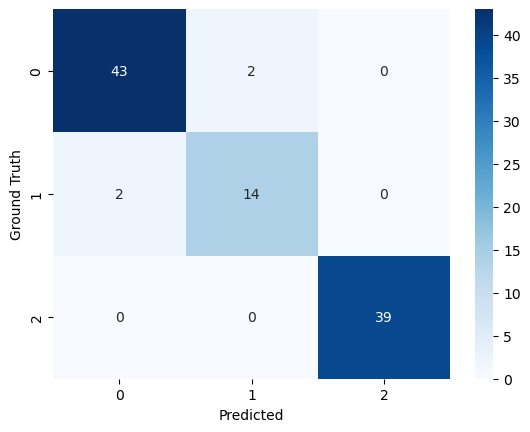

In [44]:
sns.heatmap(
    confusion_matrix(
        test.species.values,
        model.predict(test.drop(columns = ['species', 'island', 'sex']))
    ),
    annot=True,
    cmap='Blues'
)

plt.xlabel('Predicted')
plt.ylabel('Ground Truth')


In [ ]:
penquins.query('`species` != 2')

In [67]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='sex', ylabel='count'>

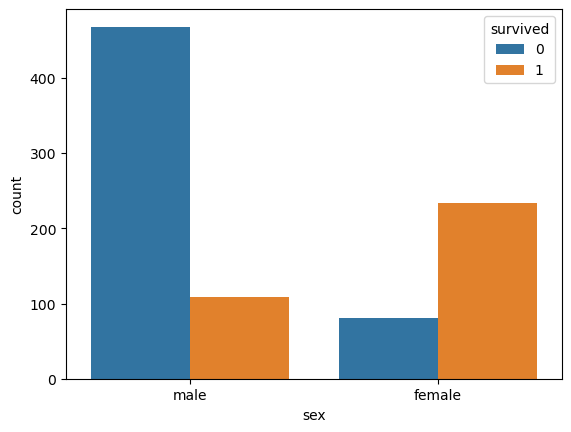

In [68]:
sns.countplot(
    titanic,
    x = 'sex',
    hue = 'survived',
)

<Axes: xlabel='pclass', ylabel='count'>

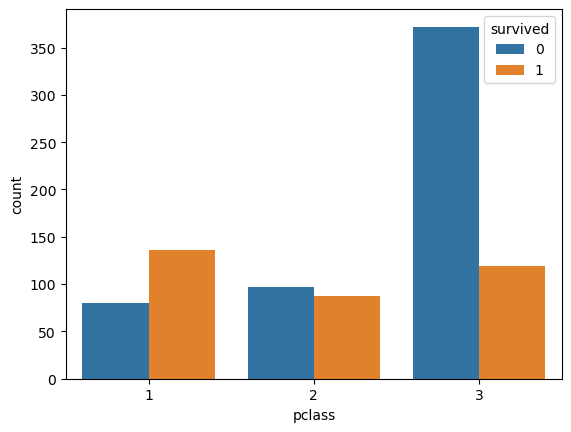

In [69]:
sns.countplot(
    titanic,
    x = 'pclass',
    hue='survived'
)

<Axes: xlabel='embark_town', ylabel='count'>

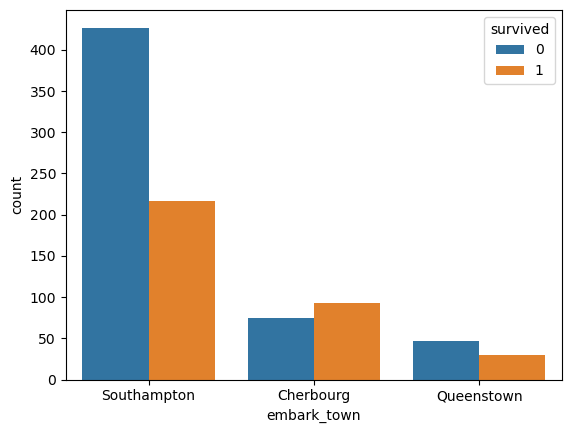

In [70]:
sns.countplot(
    titanic,
    x = 'embark_town',
    hue='survived'
)

In [92]:
titanic.deck = titanic.deck.astype(str)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (1034164356.py, line 1)

<Axes: xlabel='deck', ylabel='count'>

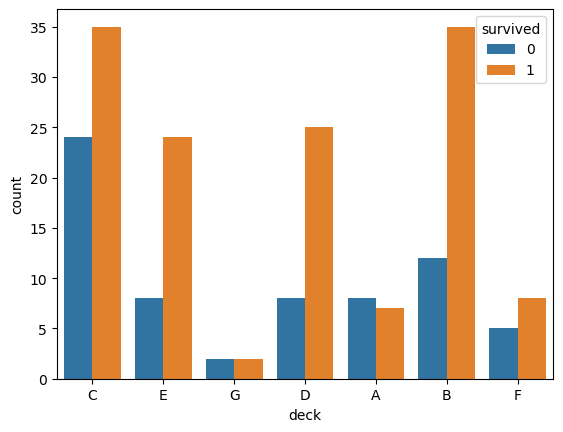

In [89]:
sns.countplot(
    titanic.assign(deck = np.where(titanic.deck != np.nan, titanic.deck, -1)),
    x = 'deck',
    hue='survived'
)

<Axes: xlabel='class', ylabel='count'>

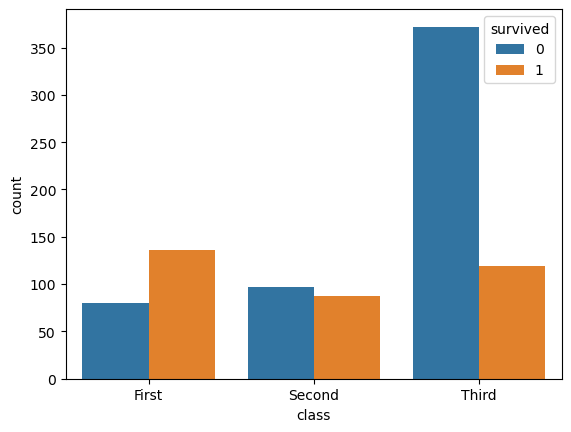

In [72]:
sns.countplot(
    titanic,
    x = 'class',
    hue='survived'
)

<Axes: xlabel='alone', ylabel='count'>

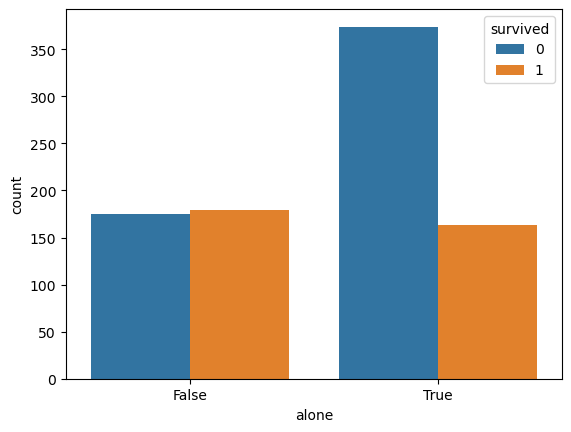

In [73]:
# 의미가없네
sns.countplot(
    titanic,
    x = 'alone',
    hue='survived'
)

<Axes: xlabel='alive', ylabel='count'>

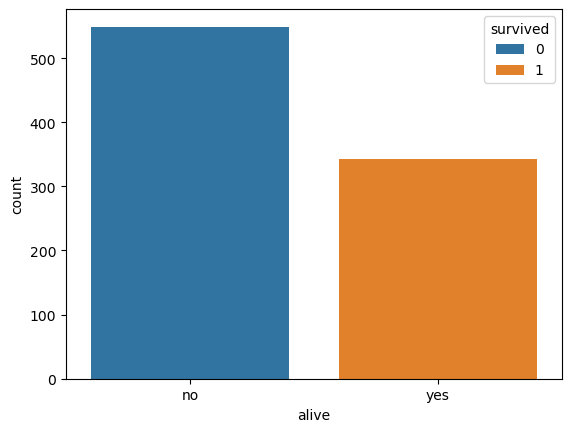

In [74]:
sns.countplot(
    titanic,
    x = 'alive',
    hue='survived'
)

<Axes: xlabel='who', ylabel='count'>

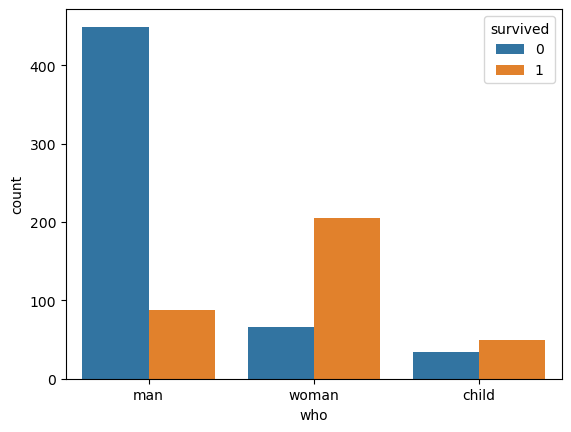

In [75]:
sns.countplot(
    titanic,
    x = 'who',
    hue='survived'
)

<Axes: xlabel='survived', ylabel='age'>

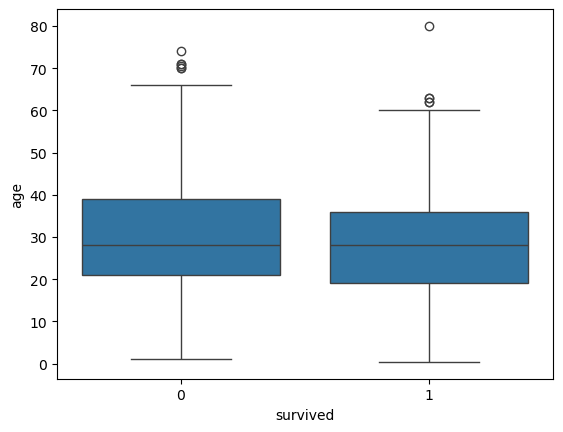

In [85]:
sns.boxplot(
    titanic,
    x = 'survived',
    y= 'age'
)

<Axes: xlabel='age', ylabel='Density'>

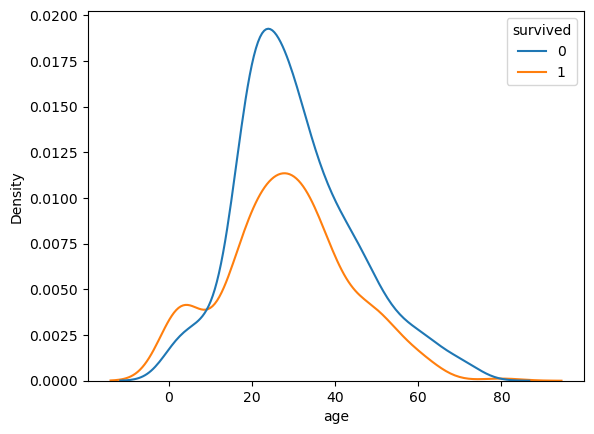

In [88]:
sns.kdeplot(
    titanic,
    x = 'age',
    hue = 'survived'
)

In [ ]:
# sex, pclass embark_town(Cherbourg) deck class(First) who

In [115]:
temp = titanic.drop(columns=['age', 'fare', 'alive']).dropna().rename(columns={ 'class' : 'class_'})
temp

,survived,pclass,sex,sibsp,parch,embarked,class_,who,adult_male,deck,embark_town,alone
0,0,3,male,1,0,S,Third,man,True,nan,Southampton,False
1,1,1,female,1,0,C,First,woman,False,C,Cherbourg,False
2,1,3,female,0,0,S,Third,woman,False,nan,Southampton,True
3,1,1,female,1,0,S,First,woman,False,C,Southampton,False
4,0,3,male,0,0,S,Third,man,True,nan,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,S,Second,man,True,nan,Southampton,True
887,1,1,female,0,0,S,First,woman,False,B,Southampton,True
888,0,3,female,1,2,S,Third,woman,False,nan,Southampton,False
889,1,1,male,0,0,C,First,man,True,C,Cherbourg,True


In [116]:
formula = ' + '.join(''.join(["C(", column,")"]) for column in temp.columns[1:])
formula

'C(pclass) + C(sex) + C(sibsp) + C(parch) + C(embarked) + C(class_) + C(who) + C(adult_male) + C(deck) + C(embark_town) + C(alone)'

In [126]:
temp.corr()

ValueError: could not convert string to float: 'Third'

In [125]:
model = logit(f'survived ~ {formula}', temp).fit()
model.summary()

         Current function value: 0.386727
         Iterations: 35


LinAlgError: Singular matrix

In [127]:
from sklearn.preprocessing import LabelEncoder

In [131]:
temp.pclass = temp.pclass.astype(object)
temp.sibsp = temp.sibsp.astype(object)
temp.parch = temp.parch.astype(object)
temp.class_ = temp.class_.astype(object)
temp.alone = temp.alone.astype(object)
temp.adult_male = temp.adult_male.astype(object)

In [132]:
label_encoders = {}
for colunm in temp.select_dtypes(object):
    label_encoder = LabelEncoder().fit(temp[colunm])
    temp[colunm] = label_encoder.transform(temp[colunm])
    
    label_encoders.update({colunm:label_encoder})

In [134]:
train, test = train_test_split(temp, test_size=0.3)

In [135]:
model = LogisticRegression().fit(train.iloc[:, 1:], train.iloc[:, 0])

In [136]:
(model.predict(test.iloc[:, 1:]) == test.survived).mean()

0.8314606741573034